## MED 1

# Przypomnienie podstawowych wiadomości

## 1. Wczytywanie danych

Wczytujemy niezbędne pakiety

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

Wczytywanie danych z pliku 'csv', informacja o ramce danych

In [ ]:
d = pd.read_csv('dane1.csv')
d.info()

Pierwszych 5 obiektów

In [3]:
d.head(10)

,atrybut1,atrybut2,klasa
0,86,43,klasa 3
1,79,50,klasa 3
2,73,49,klasa 3
3,69,49,klasa 3
4,74,43,klasa 3
5,83,25,klasa 3
6,87,27,klasa 3
7,84,20,klasa 3
8,84,39,klasa 3
9,81,43,klasa 3


Ładowanie zbioru danych dostępnego w pakiecie

In [7]:
from seaborn import load_dataset
iris = load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Te same dane mogą być dotępne w różnych formatach (iris w pakiecie scikit-learn)

In [6]:
iris_skl = datasets.load_iris()
iris_skl.target.shape
print(iris_skl.data[0:5,:])
print(iris_skl.target[0:5])
iris2 = pd.DataFrame(iris_skl.data, columns = ["sepal_length","sepal_width","petal_length","petal_width"])
iris2['species'] = iris_skl.target
iris2.head()

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Wczytywanie pliku excela

In [10]:
a = pd.read_excel('anscombe.xlsx')
print(a.info())
a.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Unnamed: 1  12 non-null     object 
 2   Unnamed: 2  12 non-null     object 
 3   Unnamed: 3  12 non-null     object 
 4   Unnamed: 4  12 non-null     object 
 5   Unnamed: 5  12 non-null     object 
 6   Unnamed: 6  12 non-null     object 
 7   Unnamed: 7  12 non-null     object 
 8   Unnamed: 8  12 non-null     object 
 9   Unnamed: 9  12 non-null     object 
dtypes: float64(1), object(9)
memory usage: 1.1+ KB
None


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Obs.,x1,y1,x2,y2,x3,y3,x4,y4
2,NaN,1,10,8.04,10,9.14,10,7.46,8,6.58
3,NaN,2,8,6.95,8,8.14,8,6.77,8,5.76
4,NaN,3,13,7.58,13,8.74,13,12.74,8,7.71


Przy pomocy dodatkowych argumentów możliwe jest precyzyjne określenie zakresu danych wczytywanych do ramki.

In [11]:
a = pd.read_excel('anscombe.xlsx',header = 2,usecols = range(1,10), index_col = 0)
print(a.info())
a

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 1 to 11
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      11 non-null     int64  
 1   y1      11 non-null     float64
 2   x2      11 non-null     int64  
 3   y2      11 non-null     float64
 4   x3      11 non-null     int64  
 5   y3      11 non-null     float64
 6   x4      11 non-null     int64  
 7   y4      11 non-null     float64
dtypes: float64(4), int64(4)
memory usage: 792.0 bytes
None


,x1,y1,x2,y2,x3,y3,x4,y4
Obs.,,,,,,,,
1,10,8.04,10,9.14,10,7.46,8,6.58
2,8,6.95,8,8.14,8,6.77,8,5.76
3,13,7.58,13,8.74,13,12.74,8,7.71
4,9,8.81,9,8.77,9,7.11,8,8.84
5,11,8.33,11,9.26,11,7.81,8,8.47
6,14,9.96,14,8.10,14,8.84,8,7.04
7,6,7.24,6,6.13,6,6.08,8,5.25
8,4,4.26,4,3.10,4,5.39,19,12.50
9,12,10.84,12,9.13,12,8.15,8,5.56


Wczytanie pliku html z lokalizacji sieciowej

In [8]:
import requests

html_page_text = requests.get('http://www.worldometers.info/geography/alphabetical-list-of-countries/');
c = pd.read_html(html_page_text.text);


panstwa = c[0]
print(panstwa.info())
panstwa.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   #                 195 non-null    int64 
 1   Country           195 non-null    object
 2   Population(2020)  195 non-null    int64 
 3   Land Area (Km²)   195 non-null    int64 
 4   Density(P/Km²)    195 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.7+ KB
None


,#,Country,Population(2020),Land Area (Km²),Density(P/Km²)
0,1,Afghanistan,38928346,652860,60
1,2,Albania,2877797,27400,105
2,3,Algeria,43851044,2381740,18
3,4,Andorra,77265,470,164
4,5,Angola,32866272,1246700,26


## 2. Dostęp do danych

Liczba obiektów i atrybutów

In [23]:
print("indeks" ,panstwa.index)
ile_panstw = panstwa.count(0)
ile_atrybutow = panstwa.count(1)
print("panstw:", min(ile_panstw), "\natrybutów:", min(ile_atrybutow))
# co daje użycie funkcji 'min' powyżej ?
# co będzie jak ją pominiemy ?
#  print("panstw:\n", ile_panstw, ", atrybutów:\n", ile_atrybutow)

indeks RangeIndex(start=0, stop=195, step=1)
panstw: 195 
atrybutów: 5


Pojedynczy atrybut

In [24]:
panstwa['Country'].head(10)

0            Afghanistan
1                Albania
2                Algeria
3                Andorra
4                 Angola
5    Antigua and Barbuda
6              Argentina
7                Armenia
8              Australia
9                Austria
Name: Country, dtype: object

Zakres obiektów

In [25]:
panstwa[10:15]

,#,Country,Population(2020),Land Area (Km²),Density(P/Km²)
10,11,Azerbaijan,10139177,82658,123
11,12,Bahamas,393244,10010,39
12,13,Bahrain,1701575,760,2239
13,14,Bangladesh,164689383,130170,1265
14,15,Barbados,287375,430,668


Wyszukiwanie po wartości atrybutu

In [26]:
panstwa[panstwa['Country']=='Poland']

,#,Country,Population(2020),Land Area (Km²),Density(P/Km²)
139,140,Poland,37846611,306230,124


Wybrane państwa i atrybuty

In [27]:
panstwa.iloc[135:145,[1, 3]]

,Country,Land Area (Km²)
135,Papua New Guinea,452860
136,Paraguay,397300
137,Peru,1280000
138,Philippines,298170
139,Poland,306230
140,Portugal,91590
141,Qatar,11610
142,Romania,230170
143,Russia,16376870
144,Rwanda,24670


Największe państwa świata

In [28]:
panstwa[panstwa.iloc[:,3]> 5000000]

,#,Country,Population(2020),Land Area (Km²),Density(P/Km²)
8,9,Australia,25499884,7682300,3
23,24,Brazil,212559417,8358140,25
32,33,Canada,37742154,9093510,4
36,37,China,1439323776,9388211,153
143,144,Russia,145934462,16376870,9
186,187,United States of America,331002651,9147420,36


Państwa o zbliżonej powierzchni do Polski

In [29]:
delta = 50000
powPl = panstwa[panstwa['Country']=='Poland'].iloc[0,3]
panstwa[(panstwa.iloc[:,3]> (powPl - delta)) & (panstwa.iloc[:,3]< (powPl + delta)) ]

,#,Country,Population(2020),Land Area (Km²),Density(P/Km²)
26,27,Burkina Faso,20903273,273600,76
28,29,Côte d'Ivoire,26378274,318000,83
39,40,Congo (Congo-Brazzaville),5518087,341500,16
59,60,Finland,5540720,303890,18
61,62,Gabon,2225734,257670,9
64,65,Germany,83783942,348560,240
83,84,Italy,60461826,294140,206
103,104,Malaysia,32365999,328550,99
123,124,New Zealand,4822233,263310,18
130,131,Oman,5106626,309500,16


> **Zadanie** Znajdź:
* państwa o zbliżonej liczbie ludności do Polski
* najbardziej podobne do Polski państwa świata pod względem zarówno powierzchni jak i liczby ludności

In [14]:
# miejsce na rozwiązanie zadania
deltaPow = 50000
deltaLud = 8000000
powPl = panstwa[panstwa['Country']=='Poland'].iloc[0,3]
ludPl = panstwa[panstwa['Country']=='Poland'].iloc[0,2]
panstwa[(panstwa.iloc[:,3]> (powPl - deltaPow)) & (panstwa.iloc[:,3]< (powPl + deltaPow)) & (panstwa.iloc[:,2]> (ludPl - deltaLud)) & (panstwa.iloc[:,2]< (ludPl + deltaLud))]

,#,Country,Population(2020),Land Area (Km²),Density(P/Km²)
103,104,Malaysia,32365999,328550,99
139,140,Poland,37846611,306230,124


## 3. Wizualizacja danych

Histogramy

   atrybut1  atrybut2    klasa
0        86        43  klasa 3
1        79        50  klasa 3
2        73        49  klasa 3
3        69        49  klasa 3
4        74        43  klasa 3


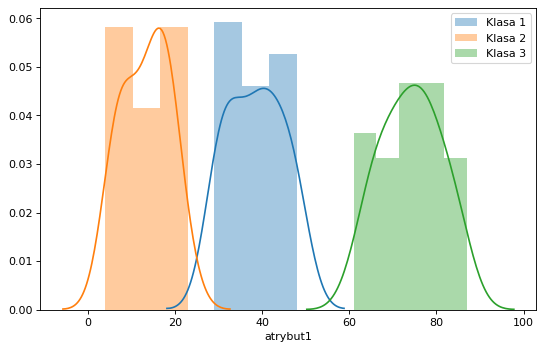

In [31]:
print(d.head())
atr = 'atrybut1'
plt.figure(figsize=(8,5), dpi= 80)
sns.distplot(d.loc[d.klasa == 'klasa 1',atr], label="Klasa 1")
sns.distplot(d.loc[d.klasa == 'klasa 2',atr], label="Klasa 2")
sns.distplot(d.loc[d.klasa == 'klasa 3',atr], label="Klasa 3")
plt.legend();

Wykresy pudełkowe

   atrybut1  atrybut2    klasa
0        86        43  klasa 3
1        79        50  klasa 3
2        73        49  klasa 3
3        69        49  klasa 3
4        74        43  klasa 3


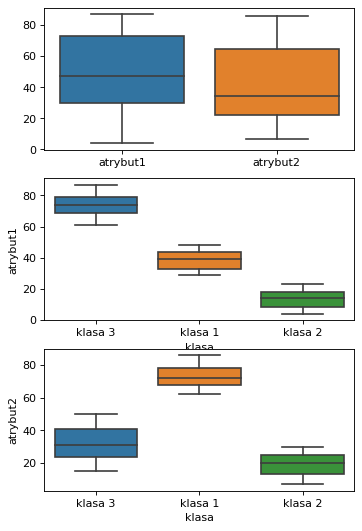

In [32]:
print(d.head())
plt.figure(figsize=(5,8), dpi= 80)
plt.subplot(3,1,1)
sns.boxplot(data=d)
plt.subplot(3,1,2)
sns.boxplot(x="klasa", y="atrybut1", data=d)
plt.subplot(3,1,3)
sns.boxplot(x="klasa", y="atrybut2", data=d)

Wykresy skrzypcowe

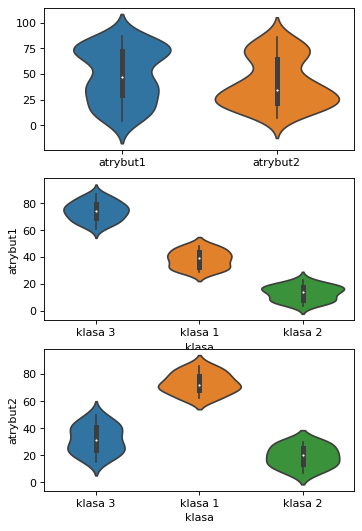

In [33]:
plt.figure(figsize=(5,8), dpi= 80)
plt.subplot(3,1,1)
sns.violinplot(data=d)
plt.subplot(3,1,2)
sns.violinplot(x="klasa", y="atrybut1", data=d)
plt.subplot(3,1,3)
sns.violinplot(x="klasa", y="atrybut2", data=d)

Wykres punktowy bez podziału na klasy

   atrybut1  atrybut2    klasa
0        86        43  klasa 3
1        79        50  klasa 3
2        73        49  klasa 3
3        69        49  klasa 3
4        74        43  klasa 3
    atrybut1  atrybut2    klasa
75        14        22  klasa 2
76         7        28  klasa 2
77         8        22  klasa 2
78         6        16  klasa 2
79         4        22  klasa 2


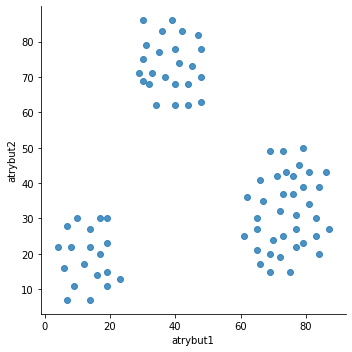

In [34]:
# wczytanie danych
print(d.head())
print(d.tail())
sns.lmplot( x="atrybut1", y="atrybut2", data=d, fit_reg=False, legend=False)

Wykres punktowy z podziałem na klasy

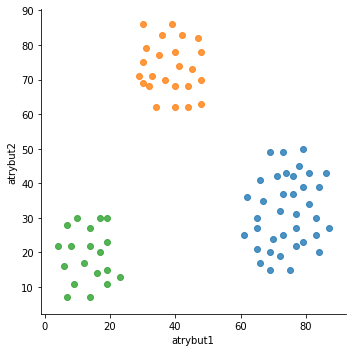

In [35]:
sns.lmplot( x="atrybut1", y="atrybut2", data=d, fit_reg=False, hue='klasa', legend=False)

Macierz wykresów punktowych bez podziału na klasy

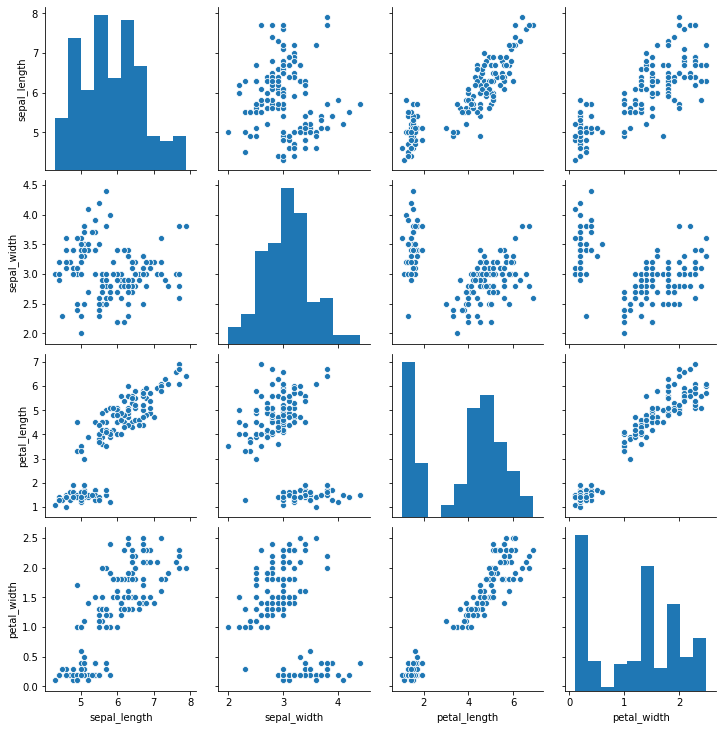

In [36]:
sns.pairplot(iris, kind="scatter")
plt.show()

Macierz wykresów puntkowych z podziałem na klasy

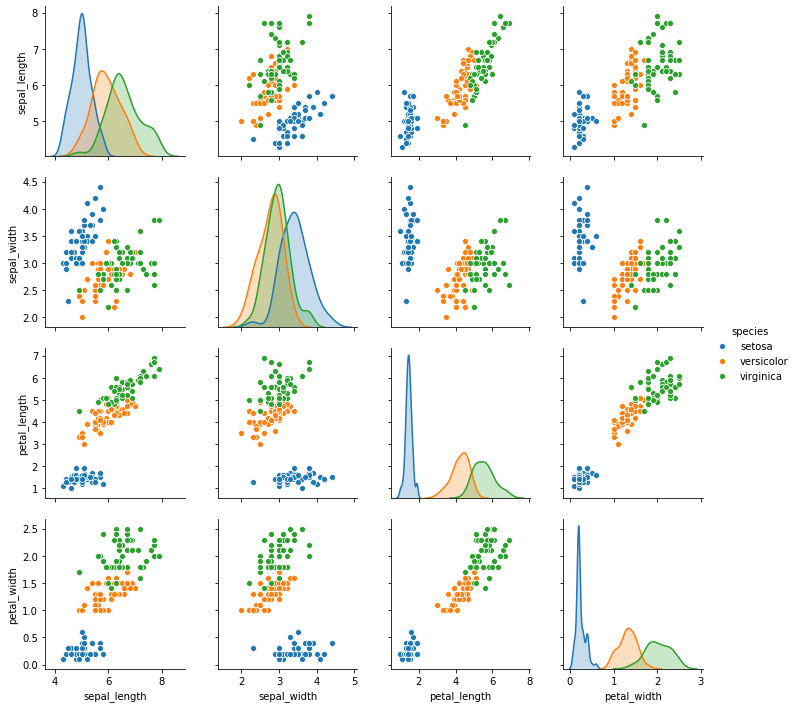

In [23]:
sns.pairplot(iris, kind="scatter", hue = "species")
plt.show()

## 4. Miary danych - statystyki opisowe

Podstawowe miary służące do opisu pojedynczego atrybutu to miary tendencji centralnej i miary rorzutu. Miary tendencji centralnej wskazują na "środek" zbioru danych. Do podstawowych miar należą: średnia arytmetyczna, mediana i moda. Inne, przykładowe miary to średnie geometryczna, harmoniczna, ważona. 

Podstawowe miary badanych zbiorów

In [37]:
print(d.info())
print('\n')
print(d.head())
print('\n')
d.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   atrybut1  80 non-null     int64 
 1   atrybut2  80 non-null     int64 
 2   klasa     80 non-null     object
dtypes: int64(2), object(1)
memory usage: 2.0+ KB
None


   atrybut1  atrybut2    klasa
0        86        43  klasa 3
1        79        50  klasa 3
2        73        49  klasa 3
3        69        49  klasa 3
4        74        43  klasa 3




,atrybut1,atrybut2
count,80.000000,80.000000
mean,49.012500,41.275000
std,26.009976,23.377461
min,4.000000,7.000000
25%,29.750000,22.000000
50%,47.500000,34.500000
75%,73.000000,64.250000
max,87.000000,86.000000


Badanie pojedynczej klasy

In [38]:
d[d['klasa'] == 'klasa 1'].describe()

,atrybut1,atrybut2
count,24.000000,24.000000
mean,38.458333,73.250000
std,6.419936,7.531095
min,29.000000,62.000000
25%,32.750000,68.000000
50%,39.500000,72.000000
75%,44.000000,78.250000
max,48.000000,86.000000


In [39]:
print(iris.info())
print('\n')
print(iris.head())
print('\n')
iris.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa




,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


> **Zadanie** Skonfrontuj, dla obu powyższych zbiorów, podstawowe miary danych z wykresami: histogramem, wykresem pudełkowym i punktowym (macierzy wykresów punktowych), dla kompletnych zbiorów i dla poszczególnych klas w tych zbiorach. Zlokalizuj poszczególne miary na wykresach. Oceń łatwość lokalizacji poszczególnych miar na każdym rodzaju wykresu. Jakie wnioski dotyczące każdego ze zbiorów danych można wyciągnąć z powyższych obserwacji ?

Podstawowe miary danych:

In [22]:
from seaborn import load_dataset
d = pd.read_csv('dane1.csv')
iris = load_dataset("iris")

In [34]:
d

,atrybut1,atrybut2,klasa
0,86,43,klasa 3
1,79,50,klasa 3
2,73,49,klasa 3
3,69,49,klasa 3
4,74,43,klasa 3
...,...,...,...
75,14,22,klasa 2
76,7,28,klasa 2
77,8,22,klasa 2
78,6,16,klasa 2


In [32]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [27]:
d.describe()

,atrybut1,atrybut2
count,80.000000,80.000000
mean,49.012500,41.275000
std,26.009976,23.377461
min,4.000000,7.000000
25%,29.750000,22.000000
50%,47.500000,34.500000
75%,73.000000,64.250000
max,87.000000,86.000000


In [24]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Atrybut1 dla całego zbioru:**

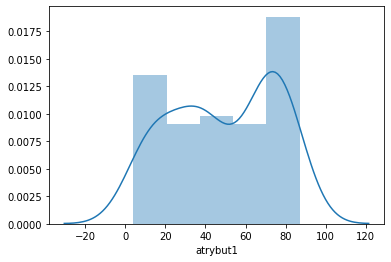

In [38]:
atr = 'atrybut1'
sns.distplot(d[atr])

**Wykres ten pozwala na określenie "na oko" wartości średniej oraz pozwala stwierdzić, że odchylenie standardowe dla atrybut1 jest znaczące, co znajduje potwierdzenie w danych uzyskanych dzięki użyciu metody describe**

**Atrybut2 dla całego zbioru:**

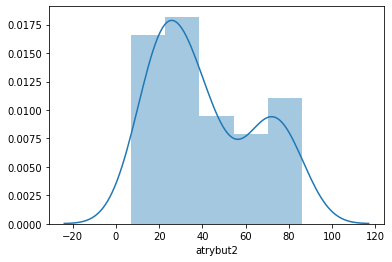

In [39]:
atr = 'atrybut2'
sns.distplot(d[atr])

**Analogicznie do poprzedniego wykresu możemy zauważyć wartość średnią, która widocznie plasuje się niżej niż dla atrybut1. Jesteśmy w stanie również stwierdzić, że odchylenie standardowe jest niższe niż w poprzednim przykładzie -- krzywa jest minimalnie bardziej zbliżona do krzywej dzwonowej**

**Sepal_length dla całego zbioru:**

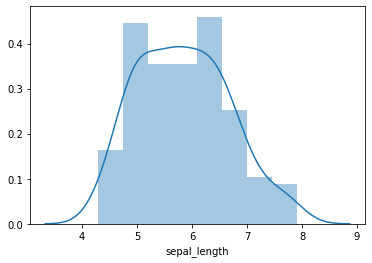

In [40]:
atr = 'sepal_length'
sns.distplot(iris[atr])

**Sepal_width dla całego zbioru:**

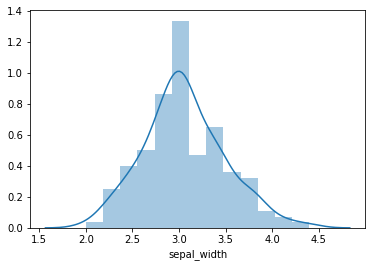

In [71]:
atr = 'sepal_width'
sns.distplot(iris[atr])

**Petal_length dla całego zbioru:**

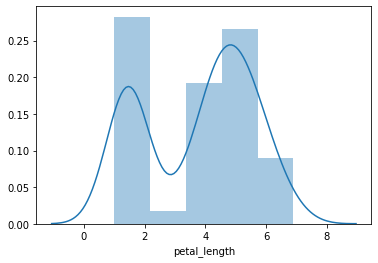

In [42]:
atr = 'petal_length'
sns.distplot(iris[atr])

**Petal_width dla całego zbioru:**

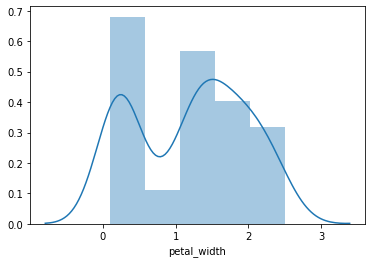

In [43]:
atr = 'petal_width'
sns.distplot(iris[atr])

**Wykresy punktowe dla obu zbiorów:**

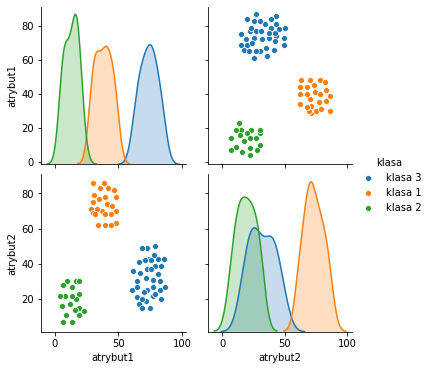

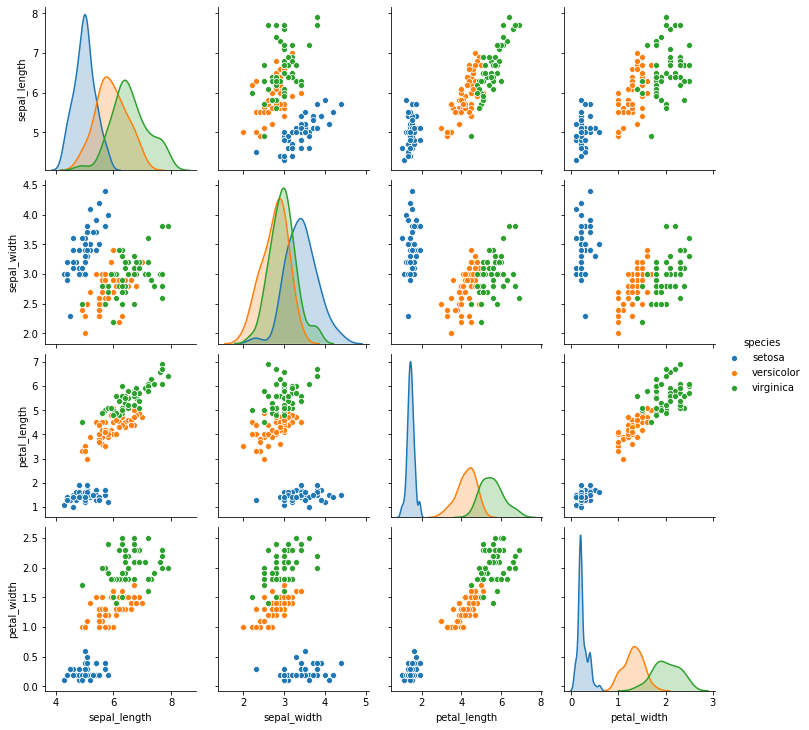

In [37]:
sns.pairplot(d, kind="scatter", hue = "klasa")
plt.show()
sns.pairplot(iris, kind="scatter", hue = "species")
plt.show()

**Histogramy dla atrybutów z obu zbiorów z podziałem na klasy:**

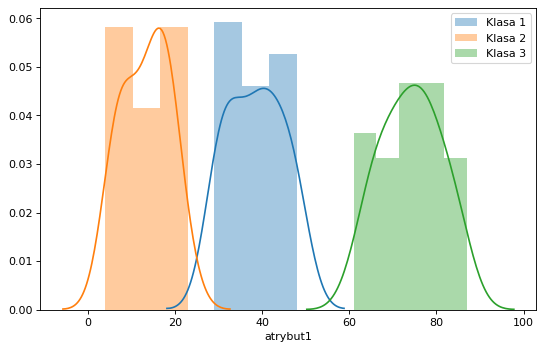

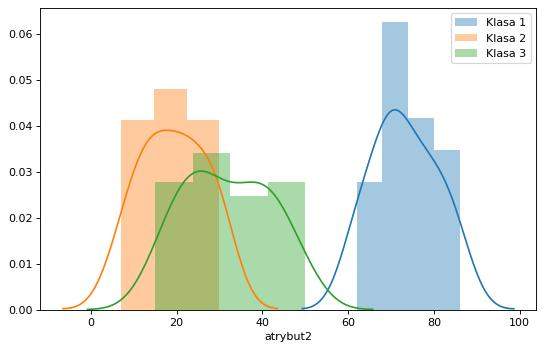

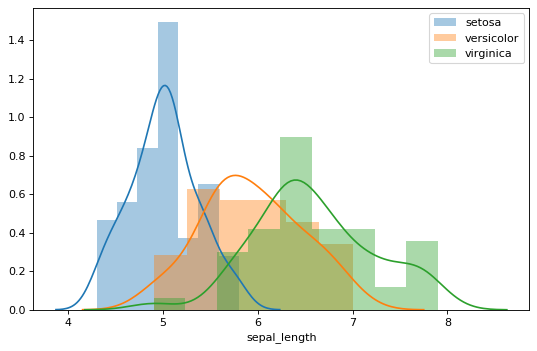

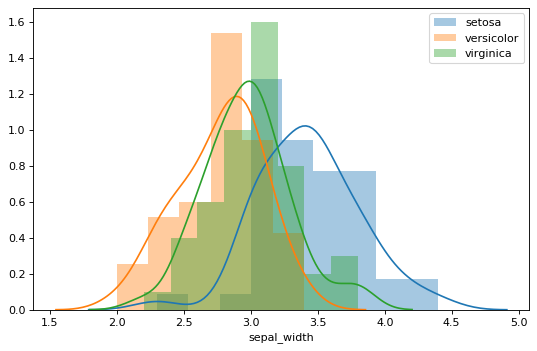

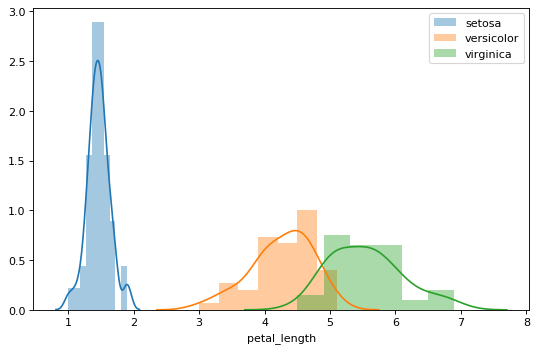

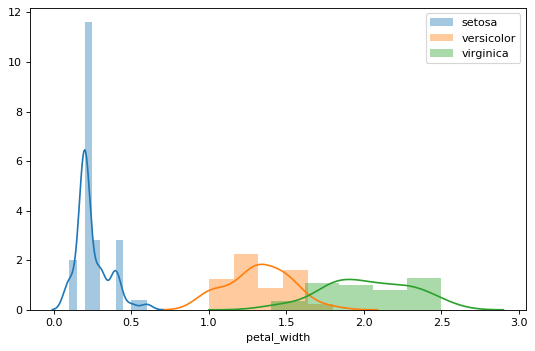

In [36]:
atr = 'atrybut1'
plt.figure(figsize=(8,5), dpi= 80)
sns.distplot(d.loc[d.klasa == 'klasa 1',atr], label="Klasa 1")
sns.distplot(d.loc[d.klasa == 'klasa 2',atr], label="Klasa 2")
sns.distplot(d.loc[d.klasa == 'klasa 3',atr], label="Klasa 3")
plt.legend();
atr = 'atrybut2'
plt.figure(figsize=(8,5), dpi= 80)
sns.distplot(d.loc[d.klasa == 'klasa 1',atr], label="Klasa 1")
sns.distplot(d.loc[d.klasa == 'klasa 2',atr], label="Klasa 2")
sns.distplot(d.loc[d.klasa == 'klasa 3',atr], label="Klasa 3")
plt.legend();
atr = 'sepal_length'
plt.figure(figsize=(8,5), dpi= 80)
sns.distplot(iris.loc[iris.species == 'setosa',atr], label="setosa")
sns.distplot(iris.loc[iris.species == 'versicolor',atr], label="versicolor")
sns.distplot(iris.loc[iris.species == 'virginica',atr], label="virginica")
plt.legend();
atr = 'sepal_width'
plt.figure(figsize=(8,5), dpi= 80)
sns.distplot(iris.loc[iris.species == 'setosa',atr], label="setosa")
sns.distplot(iris.loc[iris.species == 'versicolor',atr], label="versicolor")
sns.distplot(iris.loc[iris.species == 'virginica',atr], label="virginica")
plt.legend();
atr = 'petal_length'
plt.figure(figsize=(8,5), dpi= 80)
sns.distplot(iris.loc[iris.species == 'setosa',atr], label="setosa")
sns.distplot(iris.loc[iris.species == 'versicolor',atr], label="versicolor")
sns.distplot(iris.loc[iris.species == 'virginica',atr], label="virginica")
plt.legend();
atr = 'petal_width'
plt.figure(figsize=(8,5), dpi= 80)
sns.distplot(iris.loc[iris.species == 'setosa',atr], label="setosa")
sns.distplot(iris.loc[iris.species == 'versicolor',atr], label="versicolor")
sns.distplot(iris.loc[iris.species == 'virginica',atr], label="virginica")
plt.legend();

**Wykresy pudełkowe dla zbioru d:**

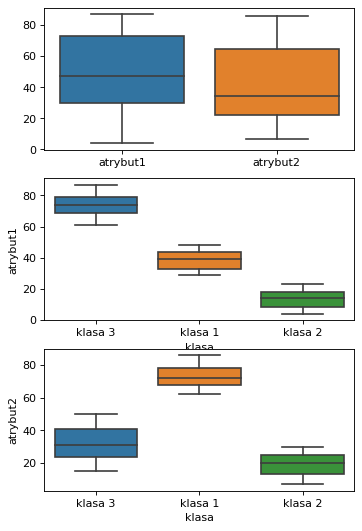

In [47]:
plt.figure(figsize=(5,8), dpi= 80)
plt.subplot(3,1,1)
sns.boxplot(data=d)
plt.subplot(3,1,2)
sns.boxplot(x="klasa", y="atrybut1", data=d)
plt.subplot(3,1,3)
sns.boxplot(x="klasa", y="atrybut2", data=d)

**Wykresy pudełkowe dla zbioru iris:**

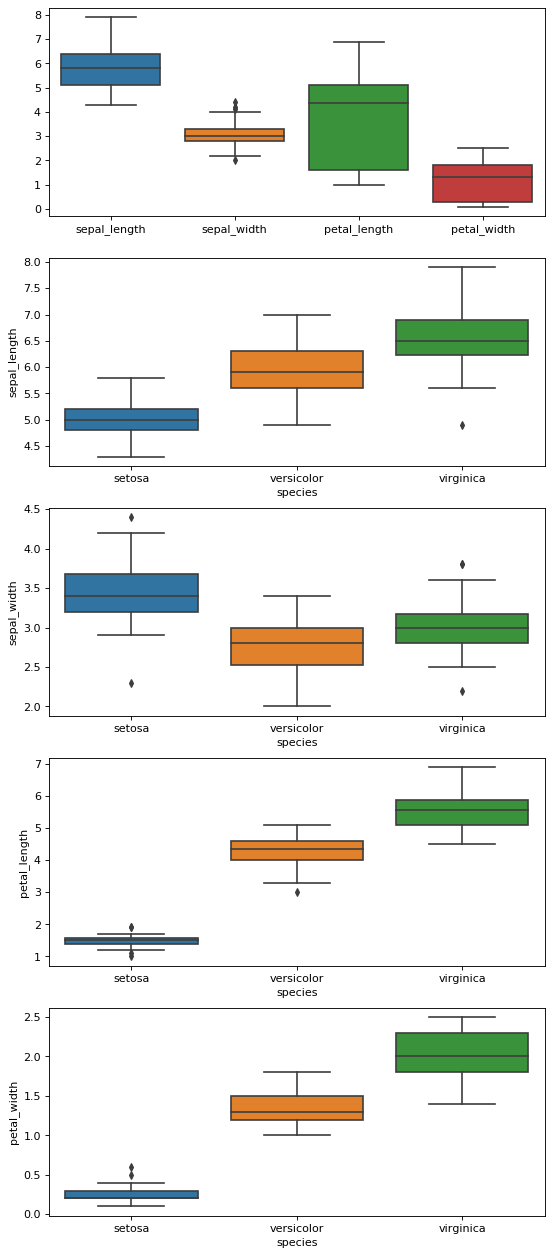

In [51]:
plt.figure(figsize=(8,20), dpi= 80)
plt.subplot(5,1,1)
sns.boxplot(data=iris)
plt.subplot(5,1,2)
sns.boxplot(x="species", y="sepal_length", data=iris)
plt.subplot(5,1,3)
sns.boxplot(x="species", y="sepal_width", data=iris)
plt.subplot(5,1,4)
sns.boxplot(x="species", y="petal_length", data=iris)
plt.subplot(5,1,5)
sns.boxplot(x="species", y="petal_width", data=iris)

**Pomimo widocznych delikatnie podstawowych miar statystycznych na histogramach, najlepsze do ich oceny są, zaprezentowane powyżej, wykresy pudełkowe. Zaznaczają one idealnie medianę, kwartyle oraz obrazują wielkość odchylenia standardowego. Na ich podstawie jesteśmy również w stanie stwierdzić jak bardzo dane minimalne i maksymalne odbiegają od wartości średnich.**

> **Zadanie** Oceń na podstawie miar oraz wykresów, jakie cechy przypadku zbiorów `d` oraz `iris` decydują o przynależności obiektów do poszczególnych klas.

**W przypadku gatunku setosa, w zbiorze iris, dobrze widać, że wyróżniającym ten gatunek atrybutem jest petal_length oraz petal_width. W przypadku pozostałych dwóch gatunków rozdzielenie ich na podstawie atrybutów jest utrudnione z racji na pokrywające się wartości. Jedynym atrybutem, który mógłby pomóc rozdzielić te kategorie jest również petal_length. W przypadku zbioru d lepszym atrybutem do rozdzielenia klas będzie atrybut1, który pozwala na wyznaczenie przedziałów, w których dana klasa przyjmuje wartości dla tego atrybutu.**

In [52]:
print(panstwa.info())
print('\n')
print(panstwa.head())
print('\n')
panstwa.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   #                 195 non-null    int64 
 1   Country           195 non-null    object
 2   Population(2020)  195 non-null    int64 
 3   Land Area (Km²)   195 non-null    int64 
 4   Density(P/Km²)    195 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.7+ KB
None


   #      Country  Population(2020)  Land Area (Km²)  Density(P/Km²)
0  1  Afghanistan          38928346           652860              60
1  2      Albania           2877797            27400             105
2  3      Algeria          43851044          2381740              18
3  4      Andorra             77265              470             164
4  5       Angola          32866272          1246700              26




,#,Population(2020),Land Area (Km²),Density(P/Km²)
count,195.000000,1.950000e+02,1.950000e+02,195.000000
mean,98.000000,3.976991e+07,6.627831e+05,353.584615
std,56.435804,1.475370e+08,1.834234e+06,1982.697443
min,1.000000,8.010000e+02,0.000000e+00,2.000000
25%,49.500000,2.023470e+06,2.299500e+04,35.500000
50%,98.000000,8.737371e+06,1.127600e+05,89.000000
75%,146.500000,2.878637e+07,5.194300e+05,214.000000
max,195.000000,1.439324e+09,1.637687e+07,26337.000000


> **Zadanie** Zastanów się, jakie wnioski odnoszące się do dystrybucji danych można wyciągnąć, analizując jednocześnie dwie miary tendencji centralnej - średnią i medianę. Wykonaj analizę wartości obu tych miar dla zbiorów `iris` oraz `panstwa`

In [53]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [69]:
result = panstwa.sort_values(['Population(2020)'], ascending=False)
result

,#,Country,Population(2020),Land Area (Km²),Density(P/Km²)
36,37,China,1439323776,9388211,153
77,78,India,1380004385,2973190,464
186,187,United States of America,331002651,9147420,36
78,79,Indonesia,273523615,1811570,151
131,132,Pakistan,220892340,770880,287
...,...,...,...,...,...
149,150,San Marino,33931,60,566
132,133,Palau,18094,460,39
181,182,Tuvalu,11792,30,393
120,121,Nauru,10824,20,541


**Dla zbioru iris średnia oraz mediana są zbliżone, co świadczy o dosyć równomiernym rozkładzie wartości dla atrybutów -- nie mamy do czynienia z dużymi odstępami, które zaburzałyby nam wynik. Odzwierciedla to fakt zauważony już wcześniej na histogramach -- są one zbliżone do krzywej dzwonowej, rozkładu naturalnego (co nie powinno nas dziwić, jako, że analizujemy zbiór danych dotyczących przyrody, natury). Dla zbioru Państwa widzimy olbrzymią rozbieżność pomiędzy średnią liczbą ludności, a medianą. Mediana jest zdecydowanie większa, z racji na obecność większej liczby Państw o ludności "dużej". Mniejsza średnia wynika z "zaniżania" jej przez wiele państw-miast, niewielkich państw wyspiarskich.**

Miary współzależności pozwalają na określenie czy i w jakim stopniu poszczególne atrybuty są od siebie zależne. Podstawową miarą zależności liniowej jest korelacja. 

In [28]:
panstwa.iloc[:,1:5].corr()

,Population(2019),Land Area (Km²),Density(P/Km²)
Population(2019),1.000000,0.448177,-0.017373
Land Area (Km²),0.448177,1.000000,-0.053682
Density(P/Km²),-0.017373,-0.053682,1.000000


In [29]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


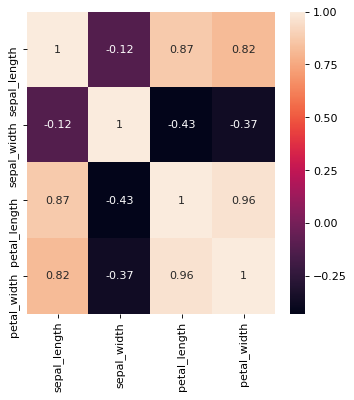

In [30]:
plt.figure(figsize=(5,5),dpi = 80)
sns.heatmap(iris.corr(),annot = iris.corr())

> **Zadanie** Skonfrontuj macierz korelacji z wykresami punktowymi zbiorów `d` oraz `iris`. Jaka jest zależność między konfiguracją punktów na wykresie punktowym a wartością miary korealcji ? Jakie wnioski odnoszące się do poszczególnych atrybutów można wyciągnąć na podstawie analizy macierzy korelacji ?  

**Dzięki macierzy korelacji jesteśmy w stanie stwierdzić jak bardzo dany argument powiązany jest z drugim, czy ich wartości zmieniają się współmiernie czy może wraz ze wzrostem jednego, maleje drugi (współczynnik korelacji dążący do -1). Dla dwóch atrybutów współczynnik korelacji przyjmuje wartości skrajne (-1 lub 1) jeśli wartości atrybutów układają się wzdłuż jednej prostej -- o współczynniku dodatnim dla korelacji dodatniej (dążącej do 1) lub oraz, analogicznie o współczynniku ujemnym, dla korelacji ujemnej (dążącej do -1)**

Pamiętajmy - dane zawsze nie tylko mierzymy ale i oglądamy !! [kwartet Anscombe'a](https://pl.wikipedia.org/wiki/Kwartet_Anscombe%E2%80%99a). 

In [31]:
a

,x1,y1,x2,y2,x3,y3,x4,y4
Obs.,,,,,,,,
1,10,8.04,10,9.14,10,7.46,8,6.58
2,8,6.95,8,8.14,8,6.77,8,5.76
3,13,7.58,13,8.74,13,12.74,8,7.71
4,9,8.81,9,8.77,9,7.11,8,8.84
5,11,8.33,11,9.26,11,7.81,8,8.47
6,14,9.96,14,8.10,14,8.84,8,7.04
7,6,7.24,6,6.13,6,6.08,8,5.25
8,4,4.26,4,3.10,4,5.39,19,12.50
9,12,10.84,12,9.13,12,8.15,8,5.56


               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000
          x         y
x  1.000000  0.816421
y  0.816421  1.000000


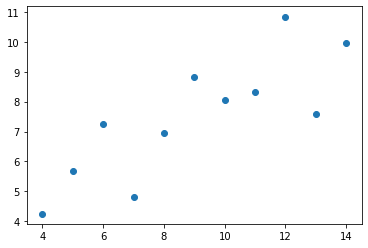

In [32]:
# Zestaw 1
a1 = a[['x1','y1']]
a1.columns = ['x','y']
plt.scatter(a1.x,a1.y)
print(a1.describe())
print(a1.corr())

               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000
          x         y
x  1.000000  0.816237
y  0.816237  1.000000


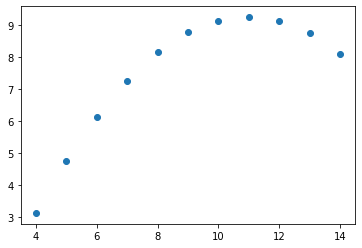

In [33]:
# Zestaw 2
a2 = a[['x2','y2']]
a2.columns = ['x','y']
plt.scatter(a2.x,a2.y)
print(a2.describe())
print(a2.corr())

               x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000
          x         y
x  1.000000  0.816287
y  0.816287  1.000000


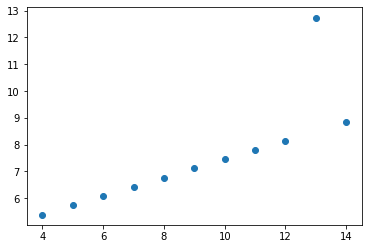

In [34]:
# Zestaw 3
a3 = a[['x3','y3']]
a3.columns = ['x','y']
plt.scatter(a3.x,a3.y)
print(a3.describe())
print(a3.corr())

               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.030579
min     8.000000   5.250000
25%     8.000000   6.170000
50%     8.000000   7.040000
75%     8.000000   8.190000
max    19.000000  12.500000
          x         y
x  1.000000  0.816521
y  0.816521  1.000000


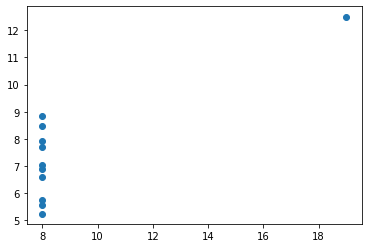

In [35]:
# Zestaw 4
a4 = a[['x4','y4']]
a4.columns = ['x','y']
plt.scatter(a4.x,a4.y)
print(a4.describe())
print(a4.corr())